<a href="https://colab.research.google.com/github/Raaj-4320/NLP/blob/main/Airbnb_review_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=268edc9380d159285713a99dd53113313766295a482e6a2622c949c346698a93
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [63]:
import pandas as pd
import numpy as np
import sys
pd.set_option('display.max_columns', 500)
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob
from collections import Counter
from bs4 import BeautifulSoup
from autocorrect import Speller



In [34]:

nltk.download('averaged_perceptron_tagger')

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
df_listings = pd.read_csv('drive/MyDrive/Datasets/Airbnb-Review-NLP/listings.csv')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import missingno as ms

In [5]:
df_listings.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20240323015102,2024-03-23,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,Sylvia,2009-02-16,"Austin, TX",I am a licensed Real Estate Broker and owner o...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/8028/profile_...,https://a0.muscache.com/im/users/8028/profile_...,East Downtown,1.0,4.0,"['email', 'phone']",t,t,"Austin, Texas, United States",78702,NaN,30.26057,-97.73441,Entire guesthouse,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Iron"", ""Heating"", ""Coffee maker"", ""Hair drye...",$107.00,2,90,2,2,90,90,2.0,90.0,NaN,t,8,29,52,310,2024-03-23,671,39,3,2009-03-08,2024-03-11,4.84,4.88,4.86,4.89,4.83,4.73,4.79,NaN,f,1,1,0,0,3.66
1,5769,https://www.airbnb.com/rooms/5769,20240323015102,2024-03-23,city scrape,NW Austin Room,NaN,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,https://www.airbnb.com/users/show/8186,Elizabeth,2009-02-19,"Austin, TX",We're easygoing professionals that enjoy meeti...,within an hour,100%,90%,t,https://a0.muscache.com/im/users/8186/profile_...,https://a0.muscache.com/im/users/8186/profile_...,SW Williamson Co.,1.0,4.0,"['email', 'phone', 'work_email']",t,t,"Austin, Texas, United States",78729,NaN,30.45697,-97.78422,Private room in home,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Iron"", ""Toaster"", ""Wine glasses"", ""Portable ...",$45.00,1,14,1,1,14,14,1.0,14.0,NaN,t,2,2,2,2,2024-03-23,295,20,0,2010-04-10,2024-01-27,4.91,4.90,4.87,4.91,4.94,4.77,4.92,NaN,f,1,0,1,0,1.74
2,6413,https://www.airbnb.com/rooms/6413,20240323015102,2024-03-23,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,https://www.airbnb.com/users/show/13879,Todd,2009-04-17,"Austin, TX","We're a young family that likes to travel, we ...",within a day,100%,67%,f,https://a0.muscache.com/im/pictures/user/4f35e...,https://a0.muscache.com/im/pictures/user/4f35e...,Travis Heights,1.0,1.0,"['email', 'phone']",t,t,"Austin, Texas, United States",78704,NaN,30.24885,-97.73587,Entire guesthouse,Entire home/apt,2,NaN,1 bath,NaN,NaN,"[""Iron"", ""37\"" HDTV with Amazon Prime Video, A...",NaN,30,90,30,30,90,90,30.0,90.0,NaN,t,0,0,0,0,2024-03-23,120,0,0,2009-12-14,2022-10-17,4.97,4.99,4.99,4.99,4.98,4.87,4.93,NaN,f,1,1,0,0,0.69
3,6448,https://www.airbnb.com/rooms/6448,20240323015102,2024-03-23,ci

In [6]:
remove_columns = ['listing_url',
                  'scrape_id',
                  'last_scraped',
                  'source',
                  'picture_url',
                  'host_url',
                  'host_name',
                  'host_location',
                  'host_about',
                  'host_response_time',
                  'host_response_time',
                  'host_acceptance_rate',
                  'host_is_superhost',
                  'host_thumbnail_url',
                  'host_picture_url',
                  'host_neighbourhood',
                  'host_neighbourhood',
                  'host_listings_count',
                  'host_total_listings_count',
                  'host_verifications',
                  'host_has_profile_pic',
                  'host_identity_verified',
                  'neighbourhood',
                  'neighbourhood_cleansed',
                  'neighbourhood_group_cleansed',
                  'room_type', 'accommodates',
                  'bathrooms',
                  'bathrooms_text',
                  'bedrooms',
                  'beds',
                  'minimum_nights',
                  'maximum_nights',
                  'minimum_minimum_nights',
                  'maximum_minimum_nights',
                  'minimum_maximum_nights',
                  'minimum_nights_avg_ntm',
                  'maximum_nights_avg_ntm',
                  'calendar_updated',
                  'has_availability',
                  'availability_30',
                  'availability_60',
                  'availability_90',
                  'availability_365',
                  'calendar_last_scraped',
                  'number_of_reviews_ltm',
                  'number_of_reviews_l30d',
                  'review_scores_accuracy',
                  'review_scores_cleanliness',
                  'review_scores_checkin',
                  'review_scores_communication',
                  'review_scores_location',
                  'review_scores_value',
                  'license',
                  'instant_bookable',
                  'calculated_host_listings_count',
                  'calculated_host_listings_count_entire_homes',
                  'calculated_host_listings_count_private_rooms',
                  'calculated_host_listings_count_shared_rooms',
                  'reviews_per_month']

In [7]:
df_listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20240323015102,2024-03-23,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,Sylvia,2009-02-16,"Austin, TX",I am a licensed Real Estate Broker and owner o...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/8028/profile_...,https://a0.muscache.com/im/users/8028/profile_...,East Downtown,1.0,4.0,"['email', 'phone']",t,t,"Austin, Texas, United States",78702,NaN,30.260570,-97.734410,Entire guesthouse,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Iron"", ""Heating"", ""Coffee maker"", ""Hair drye...",$107.00,2,90,2,2,90,90,2.0,90.0,NaN,t,8,29,52,310,2024-03-23,671,39,3,2009-03-08,2024-03-11,4.84,4.88,4.86,4.89,4.83,4.73,4.79,NaN,f,1,1,0,0,3.66
1,5769,https://www.airbnb.com/rooms/5769,20240323015102,2024-03-23,city scrape,NW Austin Room,NaN,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,https://www.airbnb.com/users/show/8186,Elizabeth,2009-02-19,"Austin, TX",We're easygoing professionals that enjoy meeti...,within an hour,100%,90%,t,https://a0.muscache.com/im/users/8186/profile_...,https://a0.muscache.com/im/users/8186/profile_...,SW Williamson Co.,1.0,4.0,"['email', 'phone', 'work_email']",t,t,"Austin, Texas, United States",78729,NaN,30.456970,-97.784220,Private room in home,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Iron"", ""Toaster"", ""Wine glasses"", ""Portable ...",$45.00,1,14,1,1,14,14,1.0,14.0,NaN,t,2,2,2,2,2024-03-23,295,20,0,2010-04-10,2024-01-27,4.91,4.90,4.87,4.91,4.94,4.77,4.92,NaN,f,1,0,1,0,1.74
2,6413,https://www.airbnb.com/rooms/6413,20240323015102,2024-03-23,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,https://www.airbnb.com/users/show/13879,Todd,2009-04-17,"Austin, TX","We're a young family that likes to travel, we ...",within a day,100%,67%,f,https://a0.muscache.com/im/pictures/user/4f35e...,https://a0.muscache.com/im/pictures/user/4f35e...,Travis Heights,1.0,1.0,"['email', 'phone']",t,t,"Austin, Texas, United States",78704,NaN,30.248850,-97.735870,Entire guesthouse,Entire home/apt,2,NaN,1 bath,NaN,NaN,"[""Iron"", ""37\"" HDTV with Amazon Prime Video, A...",NaN,30,90,30,30,90,90,30.0,90.0,NaN,t,0,0,0,0,2024-03-23,120,0,0,2009-12-14,2022-10-17,4.97,4.99,4.99,4.99,4.98,4.87,4.93,NaN,f,1,1,0,0,0.69
3,6448,https://www.airbnb.com/rooms/6448,20240323015102,2024-03

In [8]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [9]:
df_listings.drop(remove_columns, axis=1, inplace=True)

In [10]:
df_listings.sort_values(by=['id'], inplace=True)

In [11]:
df_listings.head(10)

,id,name,description,neighborhood_overview,host_id,host_since,host_response_rate,latitude,longitude,property_type,amenities,price,maximum_maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating
0,5456,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,8028,2009-02-16,100%,30.26057,-97.73441,Entire guesthouse,"[""Iron"", ""Heating"", ""Coffee maker"", ""Hair drye...",$107.00,90,671,2009-03-08,2024-03-11,4.84
1,5769,NW Austin Room,NaN,Quiet neighborhood with lots of trees and good...,8186,2009-02-19,100%,30.45697,-97.78422,Private room in home,"[""Iron"", ""Toaster"", ""Wine glasses"", ""Portable ...",$45.00,14,295,2010-04-10,2024-01-27,4.91
2,6413,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,13879,2009-04-17,100%,30.24885,-97.73587,Entire guesthouse,"[""Iron"", ""37\"" HDTV with Amazon Prime Video, A...",NaN,90,120,2009-12-14,2022-10-17,4.97
3,6448,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,14156,2009-04-20,100%,30.26034,-97.76487,Entire guesthouse,"[""Iron"", ""Oven"", ""Toaster"", ""Laundromat nearby...",$159.00,1125,314,2011-09-06,2024-03-13,4.97
4,8502,Woodland Studio Lodging,Studio rental on lower level of home located i...,NaN,25298,2009-07-11,80%,30.23466,-97.73682,Entire guest suite,"[""Kitchen"", ""Hot water"", ""Free street parking""...",$48.00,90,51,2010-02-19,2023-05-16,4.56
5,13035,Historic house in highly walkable East Austin,Comfortable 2 bedroom/2 bathroom home very cen...,East Cesar Chavez is a gentrifying urban area ...,50793,2009-11-02,100%,30.26098,-97.73072,Entire home,"[""Iron"", ""Oven"", ""Toaster"", ""Coffee"", ""Wine gl...",$135.00,180,18,2011-03-16,2023-06-19,5.00
6,22828,Garage Apartment central SE Austin,"Fully furnished, centrally located, second sto...","wikipedia: East_Riverside-Oltorf,_Austin,_Texas",56488,2009-11-22,100%,30.23614,-97.73225,Entire guesthouse,"[""Iron"", ""Oven"", ""Other electric stove"", ""Toas...",$55.00,365,51,2010-03-16,2023-08-15,4.94
7,40285,"OUTDOOR LIVING IN AUSTIN, TX",NaN,Far West Boulevard is a 10 minute walk and has...,170787,2010-07-18,NaN,30.35123,-97.76207,Entire home,"[""Iron"", ""Oven"", ""Toaster"", ""Wine glasses"", ""H...",$450.00,30,40,2011-02-28,2023-10-23,4.92
8,47572,Cozy Private Room in North Austin for Longer S...,Many guests are in transition and want time to...,It is a quiet street with few kids. The surro...,215917,2010-08-28,100%,30.37783,-97.70749,Private room in home,"[""Iron"", ""Oven"", ""Toaster"", ""Barbecue utensils...",$45.00,120,9,2019-03-19,2023-11-02,5.00
9,50318,Scooby Doo House,Beautiful apt that is central to everything! ...,This neighborhood is very very mellow and quie...,12409,2009-04-06,100%,30.28588,-97.75145,Entire condo,"[""Iron"", ""Heating"", ""Coffee maker"", ""Hair drye...",$95.00,1125,35,2010-10-25,2023-12-14,4.89


In [14]:
df_reviews = pd.read_csv('drive/MyDrive/Datasets/Airbnb-Review-NLP/reviews.csv')

In [15]:
df_reviews.sort_values(by=['listing_id'], inplace=True)

In [16]:
df_reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
202,5456,87961,2010-08-31,191905,Jaysond,Wonderful location and a great little studio a...
203,5456,89398,2010-09-02,220587,John,The host canceled my reservation.
212,5456,89797,2010-09-03,168679,Ernest,Silvias place is perfect! Great location and n...
213,5456,90343,2010-09-04,205455,John,Sylvia was an excellent host and the place was...
214,5456,100883,2010-09-20,187016,Nancy,Laura and I had a wonderful re-union in Austin...


In [17]:
df_reviews.groupby("listing_id", sort=False)["comments"].nunique()

listing_id
5456                   671
5769                   294
6413                   120
6448                   314
8502                    51
                      ... 
1111158091075903436      1
1111979082662620861      1
1112340445128039168      1
1113176930817023103      3
1114088391288353223      1
Name: comments, Length: 12321, dtype: int64

In [18]:
# Grouping reviews by listing_id and aggregating them into a list
reviews_grouped = df_reviews.groupby('listing_id')['comments'].agg(list).reset_index()

# Merging aggregated reviews back into df_listings based on listing_id
df_listings = df_listings.merge(reviews_grouped, how='left', left_on='id', right_on='listing_id')

# Dropping redundant columns and renaming the new column
# df_listings.drop(['id', 'listing_id'], axis=1, inplace=True)
df_listings.rename(columns={'comments': 'reviews'}, inplace=True)

In [19]:
df_listings['reviews'] = df_listings['reviews'].apply(lambda x: [] if not isinstance(x, list) else x)

In [20]:
df_listings.reviews.isna().sum()

0

In [21]:
df_listings.shape

(15421, 19)

In [22]:
df_listings.reviews.count()

15421

In [23]:
len(df_listings['reviews'])

15421

<Axes: >

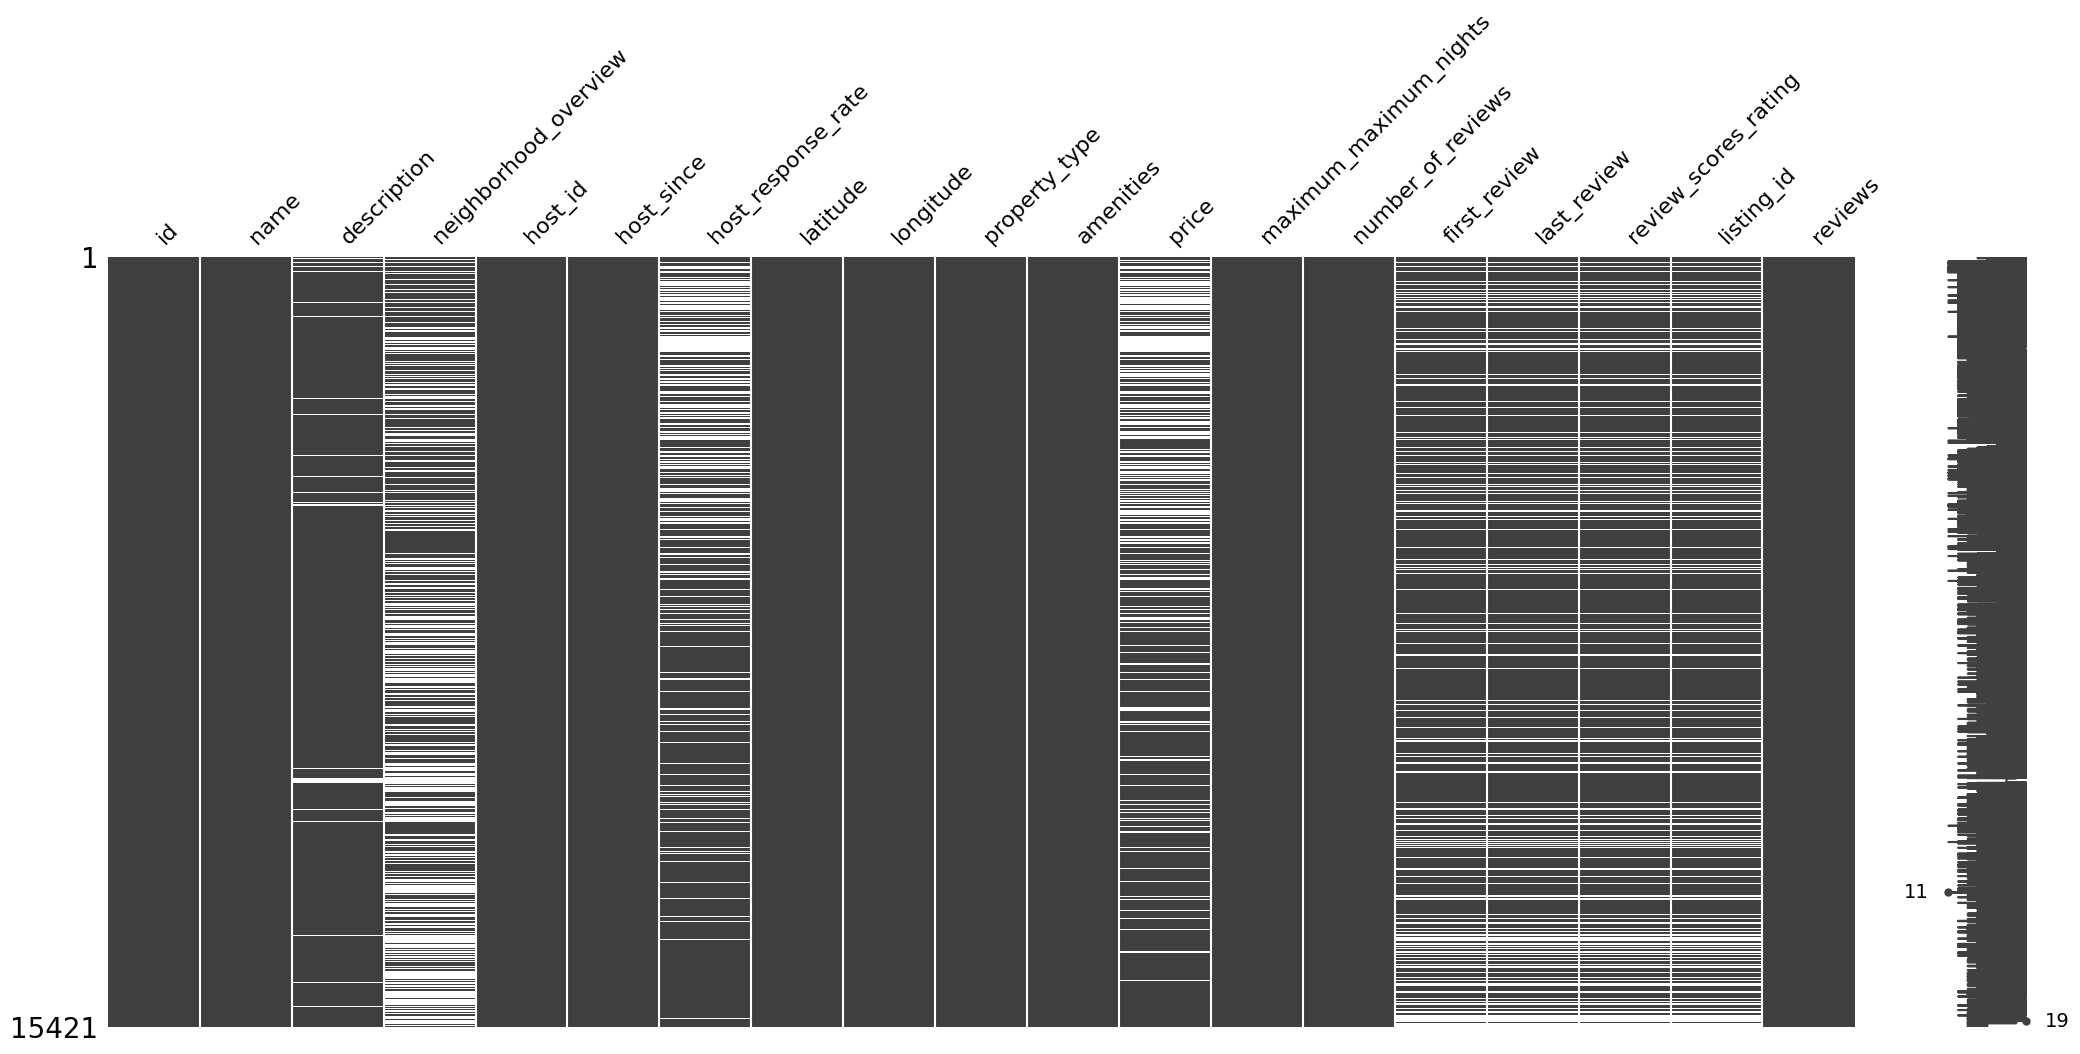

In [24]:
ms.matrix(df_listings)

In [25]:
listings_id_arr = df_listings['id'].unique()

In [26]:
listings_id_arr

array([               5456,                5769,                6413, ...,
       1118120574195171737, 1118156242105938578, 1118311262889765020])

In [27]:
reviews_id_arr = df_reviews['listing_id'].unique()

In [28]:
reviews_id_arr

array([               5456,                5769,                6413, ...,
       1112340445128039168, 1113176930817023103, 1114088391288353223])

In [29]:
# Converting arrays to sets for easier comparison
set1 = set(listings_id_arr)
set2 = set(reviews_id_arr)

# Finding the missing values from the second array
missing_values = set1 - set2

# Displaying the missing values
print("Missing values from the second array:", missing_values)

Missing values from the second array: {986978874969808897, 857282807955259397, 42532869, 765920223510372358, 1115171147011350534, 11739145, 806841134015315979, 1104635663582101520, 22888465, 13172754, 988978009659981845, 960917517817610262, 17981461, 935097677755359264, 5685281, 1092783310017904674, 1027504668440494115, 765918276060938277, 6291496, 1000458799074967593, 45637675, 856623914230284333, 749799261279952944, 27926578, 38453301, 962992449914937405, 994408465601953859, 991229267906871370, 721703190476939338, 990880457143722063, 44449873, 942611597190938705, 7618643, 576832182750142547, 765919869232513113, 729653158969811038, 11829345, 52404322, 7725153, 1116970226586411107, 849357878120751209, 659255150234329194, 926502068591738988, 11239535, 1117998636326199407, 11116656, 918799874292629617, 1110119883655831664, 1057468307089948789, 565129083853652088, 1092997102493999225, 29016185, 38297727, 548342117263786115, 17571974, 1116716758125084808, 1084387841564229775, 6677176915532

In [30]:
# Check and handle float values in 'reviews' column
def count_objects(arr):
    if isinstance(arr, list):
        return len(arr)
    elif isinstance(arr, float):
        return 0  # or any other value that makes sense in your context
    else:
        # Handle other types if needed
        return None

# Apply the function to count objects in each array
df_listings['num_reviews'] = df_listings['reviews'].apply(count_objects)


In [31]:
df_listings['reviews']

0        [Wonderful location and a great little studio ...
1        [Enjoyable stay at Elizabeth's house. Everythi...
2        [This was mine and my husband's first experien...
3        [This wonderful studio was just as described. ...
4        [The Woodland Studio was, for the most part, a...
                               ...                        
15416                                                   []
15417                                                   []
15418                                                   []
15419                                                   []
15420                                                   []
Name: reviews, Length: 15421, dtype: object

# Text - Preprocessing

In [49]:
def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text.lower())  # Convert to lowercase

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Spell correction (using TextBlob)
    corrected_words = [str(TextBlob(word).correct()) for word in words]

    # Part of speech tagging (using NLTK)
    pos_tags = nltk.pos_tag(corrected_words)

    return pos_tags

def process_reviews_for_id(df, listing_id_col, reviews_col, listing_id):
    # Fetch the reviews for the specified listing_id
    reviews_df = df[df[listing_id_col] == listing_id]

    if len(reviews_df) == 0:
        tqdm.write(f"No reviews found for listing ID {listing_id}")
        return []

    reviews = reviews_df[reviews_col].values[0]

    # Randomly select sentences, ensuring at least 20 if available
    num_sentences = min(20, len(reviews))

    # Process the selected reviews
    preprocessed_reviews = []
    selected_reviews = reviews[:num_sentences]
    for i, review in enumerate(selected_reviews):
        original_sentence = review
        preprocessed_sentence = preprocess_text(review)
        tqdm.write(f"Original Sentence {i + 1}/{num_sentences}: {original_sentence}")
        tqdm.write(f"Preprocessed Sentence {i + 1}/{num_sentences}: {preprocessed_sentence}")
        preprocessed_reviews.append((original_sentence, preprocessed_sentence))

    return preprocessed_reviews

# Example usage:
listing_id_col = 'listing_id'  # Replace with the column name for listing ID
reviews_col = 'reviews'  # Replace with the column name for reviews
listing_id = 733203  # Replace with the desired listing ID
preprocessed_reviews = process_reviews_for_id(df_listings, listing_id_col, reviews_col, listing_id)

Original Sentence 1/20: We truly appreciate Justin & Becca hosting us after our previous plans had gone awry. The incredibly-decorated property is in a great location, and Justin & Becca were very responsive.
Preprocessed Sentence 1/20: [('truly', 'RB'), ('appreci', 'JJ'), ('austin', 'NN'), ('&', 'CC'), ('bench', 'NN'), ('host', 'NN'), ('u', 'VBP'), ('previous', 'JJ'), ('plan', 'NN'), ('gone', 'VBN'), ('awry', 'RB'), ('.', '.'), ('incredibly-door', 'JJ'), ('property', 'NN'), ('great', 'JJ'), ('local', 'JJ'), (',', ','), ('austin', 'JJ'), ('&', 'CC'), ('bench', 'JJ'), ('response', 'NN'), ('.', '.')]
Original Sentence 2/20: Our team loved the place! Great location within walking distance to multiple restaurants and shops, very stylish. Water in the showers was not hot but not so much that it was uncomfortable or distracting - just good to know if you NEED that kind of thing. There are a few great sitting rooms in the house, including a comfy & cozy space upstairs with lots of pillows, a 

In [51]:
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Tokenization
    words = word_tokenize(text.lower())  # Convert to lowercase

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Spell correction (using TextBlob)
    corrected_words = [str(TextBlob(word).correct()) for word in words]

    # Part of speech tagging (using NLTK)
    pos_tags = nltk.pos_tag(corrected_words)

    return pos_tags

def process_reviews_for_id(df, listing_id_col, reviews_col, listing_id):
    # Fetch the reviews for the specified listing_id
    reviews_df = df[df[listing_id_col] == listing_id]

    if len(reviews_df) == 0:
        tqdm.write(f"No reviews found for listing ID {listing_id}")
        return []

    reviews = reviews_df[reviews_col].values[0]

    # Randomly select sentences, ensuring at least 20 if available
    num_sentences = min(20, len(reviews))

    # Process the selected reviews
    preprocessed_reviews = []
    selected_reviews = reviews[:num_sentences]
    for i, review in enumerate(selected_reviews):
        original_sentence = review
        preprocessed_sentence = preprocess_text(review)
        tqdm.write(f"Original Sentence {i + 1}/{num_sentences}: {original_sentence}")
        tqdm.write(f"Preprocessed Sentence {i + 1}/{num_sentences}: {preprocessed_sentence}")
        preprocessed_reviews.append((original_sentence, preprocessed_sentence))

    return preprocessed_reviews

# Example usage:
listing_id_col = 'listing_id'  # Replace with the column name for listing ID
reviews_col = 'reviews'  # Replace with the column name for reviews
listing_id = 733203  # Replace with the desired listing ID
preprocessed_reviews = process_reviews_for_id(df_listings, listing_id_col, reviews_col, listing_id)

Original Sentence 1/20: We truly appreciate Justin & Becca hosting us after our previous plans had gone awry. The incredibly-decorated property is in a great location, and Justin & Becca were very responsive.
Preprocessed Sentence 1/20: [('truly', 'RB'), ('appreci', 'JJ'), ('austin', 'NN'), ('&', 'CC'), ('bench', 'NN'), ('host', 'NN'), ('u', 'VBP'), ('previous', 'JJ'), ('plan', 'NN'), ('gone', 'VBN'), ('awry', 'RB'), ('.', '.'), ('incredibly-door', 'JJ'), ('property', 'NN'), ('great', 'JJ'), ('local', 'JJ'), (',', ','), ('austin', 'JJ'), ('&', 'CC'), ('bench', 'JJ'), ('response', 'NN'), ('.', '.')]
Original Sentence 2/20: Our team loved the place! Great location within walking distance to multiple restaurants and shops, very stylish. Water in the showers was not hot but not so much that it was uncomfortable or distracting - just good to know if you NEED that kind of thing. There are a few great sitting rooms in the house, including a comfy & cozy space upstairs with lots of pillows, a 

In [52]:
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Tokenization
    words = word_tokenize(text.lower())  # Convert to lowercase

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Spell correction
    corrected_words = [str(TextBlob(word).correct()) for word in words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in corrected_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]

    # Part of speech tagging
    pos_tags = nltk.pos_tag(lemmatized_words)

    return pos_tags

def process_reviews_for_id(df, listing_id_col, reviews_col, listing_id):
    # Fetch the reviews for the specified listing_id
    reviews_df = df[df[listing_id_col] == listing_id]

    if len(reviews_df) == 0:
        tqdm.write(f"No reviews found for listing ID {listing_id}")
        return []

    reviews = reviews_df[reviews_col].values[0]

    # Randomly select sentences, ensuring at least 20 if available
    num_sentences = min(20, len(reviews))

    # Process the selected reviews
    preprocessed_reviews = []
    selected_reviews = reviews[:num_sentences]
    for i, review in enumerate(selected_reviews):
        original_sentence = review
        preprocessed_sentence = preprocess_text(review)
        tqdm.write(f"Original Sentence {i + 1}/{num_sentences}: {original_sentence}")
        tqdm.write(f"Preprocessed Sentence {i + 1}/{num_sentences}: {preprocessed_sentence}")
        preprocessed_reviews.append((original_sentence, preprocessed_sentence))

    return preprocessed_reviews

# Example usage:
listing_id_col = 'listing_id'  # Replace with the column name for listing ID
reviews_col = 'reviews'  # Replace with the column name for reviews
listing_id = 733203  # Replace with the desired listing ID
preprocessed_reviews = process_reviews_for_id(df_listings, listing_id_col, reviews_col, listing_id)

Original Sentence 1/20: We truly appreciate Justin & Becca hosting us after our previous plans had gone awry. The incredibly-decorated property is in a great location, and Justin & Becca were very responsive.
Preprocessed Sentence 1/20: [('truli', 'NNS'), ('appreci', 'VBP'), ('austin', 'NN'), ('&', 'CC'), ('bench', 'NN'), ('cost', 'NN'), ('u', 'JJ'), ('previou', 'NN'), ('plan', 'NN'), ('gone', 'VBN'), ('awri', 'JJ'), ('.', '.'), ('incredibly-decor', 'JJ'), ('properti', 'NN'), ('great', 'JJ'), ('locat', 'NN'), (',', ','), ('austin', 'NN'), ('&', 'CC'), ('bench', 'NN'), ('respons', 'NNS'), ('.', '.')]
Original Sentence 2/20: Our team loved the place! Great location within walking distance to multiple restaurants and shops, very stylish. Water in the showers was not hot but not so much that it was uncomfortable or distracting - just good to know if you NEED that kind of thing. There are a few great sitting rooms in the house, including a comfy & cozy space upstairs with lots of pillows, a

In [53]:
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Tokenization
    words = word_tokenize(text.lower())  # Convert to lowercase

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Spell correction
    corrected_words = [str(TextBlob(word).correct()) for word in words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in corrected_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]

    # Part of speech tagging
    pos_tags = nltk.pos_tag(lemmatized_words)

    return pos_tags

def process_reviews_for_id(df, listing_id_col, reviews_col, listing_id):
    # Fetch the reviews for the specified listing_id
    reviews_df = df[df[listing_id_col] == listing_id]

    if len(reviews_df) == 0:
        print(f"No reviews found for listing ID {listing_id}")
        return []

    reviews = reviews_df[reviews_col].values[0]

    # Randomly select sentences, ensuring at least 20 if available
    num_sentences = min(20, len(reviews))

    # Process the selected reviews
    preprocessed_reviews = []
    selected_reviews = reviews[:num_sentences]
    for i, review in enumerate(selected_reviews):
        original_sentence = review
        preprocessed_sentence = preprocess_text(review)
        print(f"Original Sentence {i + 1}/{num_sentences}: {original_sentence}")
        print(f"Preprocessed Sentence {i + 1}/{num_sentences}: {preprocessed_sentence}")
        preprocessed_reviews.append((original_sentence, preprocessed_sentence))

    return preprocessed_reviews

# Example usage:
listing_id_col = 'listing_id'  # Replace with the column name for listing ID
reviews_col = 'reviews'  # Replace with the column name for reviews
listing_id = 733203  # Replace with the desired listing ID
preprocessed_reviews = process_reviews_for_id(df_listings, listing_id_col, reviews_col, listing_id)

Original Sentence 1/20: We truly appreciate Justin & Becca hosting us after our previous plans had gone awry. The incredibly-decorated property is in a great location, and Justin & Becca were very responsive.
Preprocessed Sentence 1/20: [('truli', 'NNS'), ('appreci', 'VBP'), ('austin', 'NN'), ('&', 'CC'), ('bench', 'NN'), ('cost', 'NN'), ('u', 'JJ'), ('previou', 'NN'), ('plan', 'NN'), ('gone', 'VBN'), ('awri', 'JJ'), ('.', '.'), ('incredibly-decor', 'JJ'), ('properti', 'NN'), ('great', 'JJ'), ('locat', 'NN'), (',', ','), ('austin', 'NN'), ('&', 'CC'), ('bench', 'NN'), ('respons', 'NNS'), ('.', '.')]
Original Sentence 2/20: Our team loved the place! Great location within walking distance to multiple restaurants and shops, very stylish. Water in the showers was not hot but not so much that it was uncomfortable or distracting - just good to know if you NEED that kind of thing. There are a few great sitting rooms in the house, including a comfy & cozy space upstairs with lots of pillows, a

In [66]:
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Tokenization
    words = word_tokenize(text.lower())  # Convert to lowercase

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Spell correction for non-proper nouns and lowercase words
    corrected_words = []
    for word in words:
        if nltk.pos_tag([word])[0][1] != 'NNP' and word.islower():
            corrected_word = str(TextBlob(word).correct())
            corrected_words.append(corrected_word)
        else:
            corrected_words.append(word)

    # Stemming using Porter Stemmer
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in corrected_words]

    # Part of speech tagging
    pos_tags = nltk.pos_tag(corrected_words)

    return pos_tags


def process_reviews_for_id(df, listing_id_col, reviews_col, listing_id):
    # Fetch the reviews for the specified listing_id
    reviews_df = df[df[listing_id_col] == listing_id]

    if len(reviews_df) == 0:
        print(f"No reviews found for listing ID {listing_id}")
        return []

    reviews = reviews_df[reviews_col].values[0]

    # Randomly select sentences, ensuring at least 20 if available
    num_sentences = min(20, len(reviews))

    # Process the selected reviews
    preprocessed_reviews = []
    selected_reviews = reviews[:num_sentences]
    for i, review in enumerate(selected_reviews):
        original_sentence = review
        preprocessed_sentence = preprocess_text(review)
        print(f"Original Sentence {i + 1}/{num_sentences}: {original_sentence}")
        print(f"Preprocessed Sentence {i + 1}/{num_sentences}: {preprocessed_sentence}")
        preprocessed_reviews.append((original_sentence, preprocessed_sentence))

    return preprocessed_reviews

# Example usage:
listing_id_col = 'listing_id'  # Replace with the column name for listing ID
reviews_col = 'reviews'  # Replace with the column name for reviews
listing_id = 733203  # Replace with the desired listing ID
preprocessed_reviews = process_reviews_for_id(df_listings, listing_id_col, reviews_col, listing_id)

Original Sentence 1/20: We truly appreciate Justin & Becca hosting us after our previous plans had gone awry. The incredibly-decorated property is in a great location, and Justin & Becca were very responsive.
Preprocessed Sentence 1/20: [('truly', 'RB'), ('appreciate', 'JJ'), ('austin', 'NN'), ('&', 'CC'), ('bench', 'NN'), ('costing', 'VBG'), ('us', 'PRP'), ('previous', 'JJ'), ('plans', 'NNS'), ('gone', 'VBN'), ('awry', 'RB'), ('.', '.'), ('incredibly-decorated', 'JJ'), ('property', 'NN'), ('great', 'JJ'), ('location', 'NN'), (',', ','), ('austin', 'NN'), ('&', 'CC'), ('bench', 'NN'), ('responsive', 'NN'), ('.', '.')]
Original Sentence 2/20: Our team loved the place! Great location within walking distance to multiple restaurants and shops, very stylish. Water in the showers was not hot but not so much that it was uncomfortable or distracting - just good to know if you NEED that kind of thing. There are a few great sitting rooms in the house, including a comfy & cozy space upstairs with

# Identify Names entity and correct the words
# use porterstemmer lemmatized word for
# This part of speech is sentiment analysis so no need of porterstemmer lemmatizing